# Installing mlxtend library

Mlxtend stands for Machine Learning Extensions. It is a third-party Python library which contains many utilities and tools for machine learning and Data Science tasks, including feature selection, ensemble methods, visualization, and model evaluation.In this project we use Apriori algorithm for datamining and analysis.Apriori is imported from mlxtend library.

In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
pip install mlxtend --upgrade --no-deps

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Importing all necessary libraries

1.pandas->dataframe,
2.mlxtend->association rule,apriori algorithm,
3.matplotlib->graphical tools,
4.numpy->array,
5.plotly->graphical tools,



In [4]:
import pandas as pd
import mlxtend
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from pandas.api.types import CategoricalDtype
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from IPython.display import display, HTML

In [5]:
df=pd.read_csv("C:\\Users\\Akshata Pandit\\OneDrive\\vscode1\\marketbasket analysis\\Groceries_dataset.csv")

In [6]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# Data exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [8]:
df.head

<bound method NDFrame.head of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [9]:
df.duplicated().sum()

759

In [10]:
df['Member_number'].duplicated().sum()

34867

In [11]:
df.shape

(38765, 3)

In [12]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [13]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

# Data preprocessing

In [14]:
splitting=df['Date'].str.split('-',expand=True)

In [15]:
df['day']=splitting[0]
df['month']=splitting[1]
df['year']=splitting[2]


In [16]:
df

,Member_number,Date,itemDescription,day,month,year
0,1808,21-07-2015,tropical fruit,21,07,2015
1,2552,05-01-2015,whole milk,05,01,2015
2,2300,19-09-2015,pip fruit,19,09,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,01,02,2015
...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,08,10,2014
38761,2022,23-02-2014,candy,23,02,2014
38762,1097,16-04-2014,cake bar,16,04,2014
38763,1510,03-12-2014,fruit/vegetable juice,03,12,2014


In [17]:
arrange={'01':'January','02':'February','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'}
df['month']=df['month'].apply(lambda X:arrange[X])

In [18]:
df

,Member_number,Date,itemDescription,day,month,year
0,1808,21-07-2015,tropical fruit,21,July,2015
1,2552,05-01-2015,whole milk,05,January,2015
2,2300,19-09-2015,pip fruit,19,September,2015
3,1187,12-12-2015,other vegetables,12,December,2015
4,3037,01-02-2015,whole milk,01,February,2015
...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,08,October,2014
38761,2022,23-02-2014,candy,23,February,2014
38762,1097,16-04-2014,cake bar,16,April,2014
38763,1510,03-12-2014,fruit/vegetable juice,03,December,2014


In [19]:
from datetime import datetime 
format='%d-%m-%Y'
df['Date']=pd.to_datetime(df['Date'],format=format)
df['day_of_the_week']=df['Date'].dt.strftime('%A')
df['weekday_weekend'] = df['day_of_the_week'].map(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')
df

,Member_number,Date,itemDescription,day,month,year,day_of_the_week,weekday_weekend
0,1808,2015-07-21,tropical fruit,21,July,2015,Tuesday,weekday
1,2552,2015-01-05,whole milk,05,January,2015,Monday,weekday
2,2300,2015-09-19,pip fruit,19,September,2015,Saturday,weekend
3,1187,2015-12-12,other vegetables,12,December,2015,Saturday,weekend
4,3037,2015-02-01,whole milk,01,February,2015,Sunday,weekend
...,...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,08,October,2014,Wednesday,weekday
38761,2022,2014-02-23,candy,23,February,2014,Sunday,weekend
38762,1097,2014-04-16,cake bar,16,April,2014,Wednesday,weekday
38763,1510,2014-12-03,fruit/vegetable juice,03,December,2014,Wednesday,weekday


In [20]:
count_days=df['weekday_weekend'].value_counts()
count_days.head()

weekday_weekend
weekday    27684
weekend    11081
Name: count, dtype: int64

ON weekday there is a sale of an average 5536.8 and on weekends it's 5540.5.

In [21]:
count_months=df['month'].value_counts()
count_months

month
August       3496
May          3408
January      3324
July         3300
June         3264
October      3261
April        3260
November     3254
March        3133
September    3059
December     3009
February     2997
Name: count, dtype: int64

There is no much difference in the sales in groceries in different months of the year

In [22]:
freq=df['itemDescription'].value_counts().head(60)
freq

itemDescription
whole milk                  2502
other vegetables            1898
rolls/buns                  1716
soda                        1514
yogurt                      1334
root vegetables             1071
tropical fruit              1032
bottled water                933
sausage                      924
citrus fruit                 812
pastry                       785
pip fruit                    744
shopping bags                731
canned beer                  717
bottled beer                 687
whipped/sour cream           662
newspapers                   596
frankfurter                  580
brown bread                  571
pork                         566
domestic eggs                566
butter                       534
fruit/vegetable juice        518
beef                         516
curd                         514
margarine                    491
coffee                       476
frozen vegetables            425
chicken                      422
white bread                

Wholemilk and vegetables are the highest sold grocery item


# Graphical analysis

In [62]:
fig=px.bar(freq.head(20),title ='Top 20 Items', text_auto ='.3s',
                 labels = {
                     "index": "Items",
                     "values": "Quantity",
                     'lift': 'Lift'
                 })
fig.update_layout(title_x = 0.5, title_y = 0.86)
fig.show()

NameError: name 'savefig' is not defined

Wholemilk,vegetables,rolls/buns,soda,yogurt are the top 5 most sold grocery items.

In [24]:
items=df.groupby(pd.Grouper(key='itemDescription')).size().reset_index(name='count')

In [25]:
items

,itemDescription,count
0,tropical fruit,1032
1,whole milk,2502
2,pip fruit,744
3,other vegetables,1898
4,rolls/buns,1716
...,...,...
162,pudding powder,17
163,ready soups,15
164,make up remover,5
165,toilet cleaner,5


C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



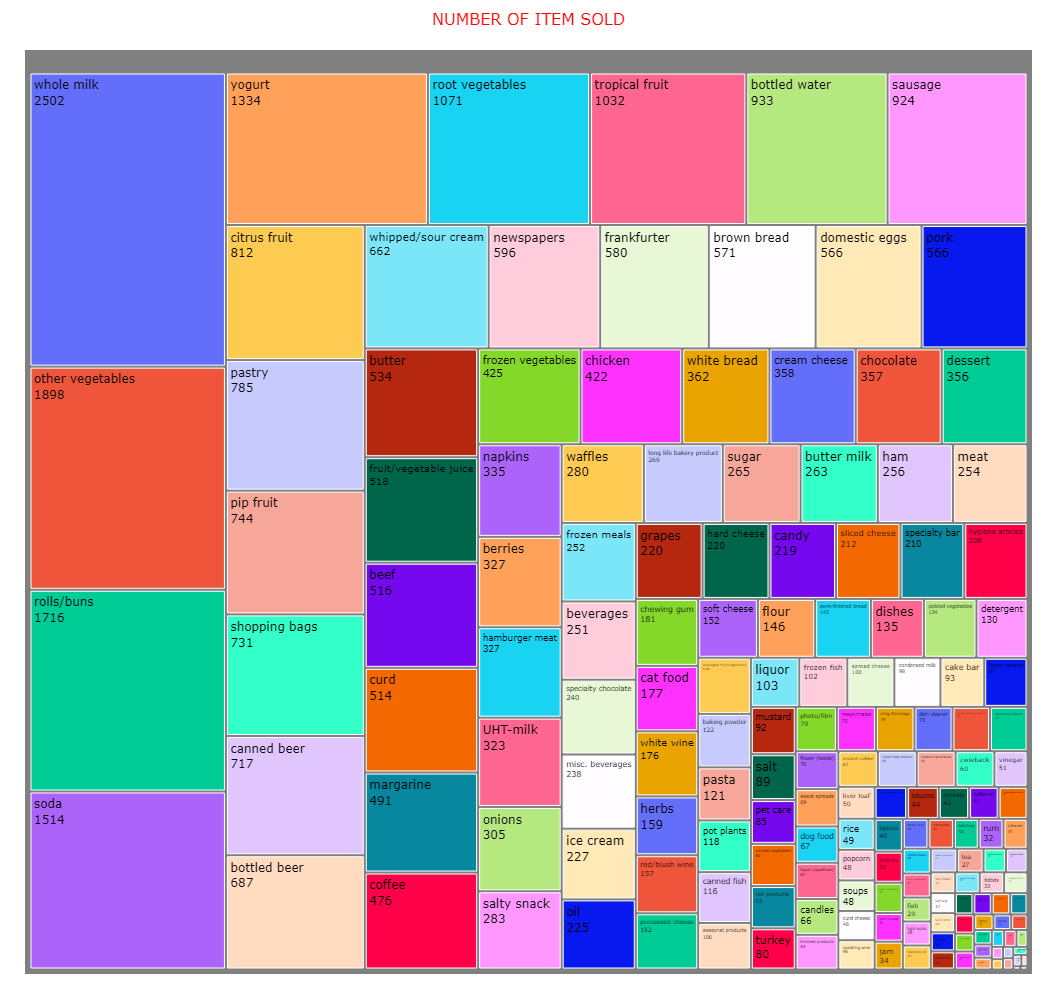

In [26]:

fig=px.treemap(items,path=['itemDescription'],values='count')
fig.update_layout(
    title_text = 'NUMBER OF ITEM SOLD',
    font_color='red',
    title_x =.5, title_font = dict(size = 16),
    height = 999)
fig.update_traces(textinfo = "label+value",root_color='grey',textfont_color='violet')
fig.update_traces(textfont_color='#000000')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [27]:
day=df.groupby(pd.Grouper(key=('day_of_the_week'))).size().reset_index(name='count')

In [28]:
day

,day_of_the_week,count
0,Tuesday,5558
1,Monday,5382
2,Saturday,5551
3,Sunday,5530
4,Friday,5562
5,Wednesday,5562
6,Thursday,5620


C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



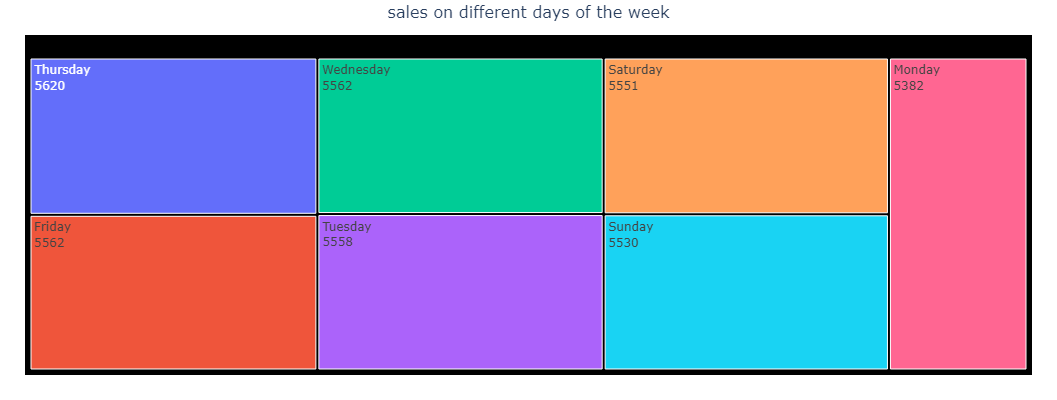

In [29]:
fig1=px.treemap(day,path=['day_of_the_week'],values='count')
fig1.update_layout(title_text='sales on different days of the week',title_x=0.5,margin=dict(r=25,l=25,b=25,t=35), title_font = dict(size = 16),
    height =400)
fig1.update_traces(textinfo="label+value",root_color='black')
fig1.show()

In [30]:
years=df.groupby('year')['itemDescription'].count().reset_index()
years

,year,itemDescription
0,2014,18277
1,2015,20488


Text(0.5, 1.0, 'Sales by Years')

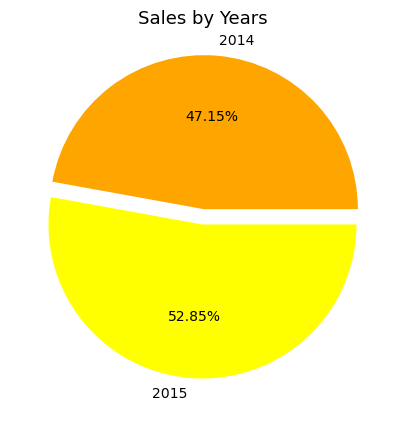

In [31]:
year=years['year'].tolist()
item=years['itemDescription']
plt.figure(figsize = (13, 5))
explod=(0.1, 0)
colors=['orange','yellow']
plt.pie(item,labels=year,autopct='%1.2f%%', explode=explod,colors=colors)
plt.title('Sales by Years', size=13)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



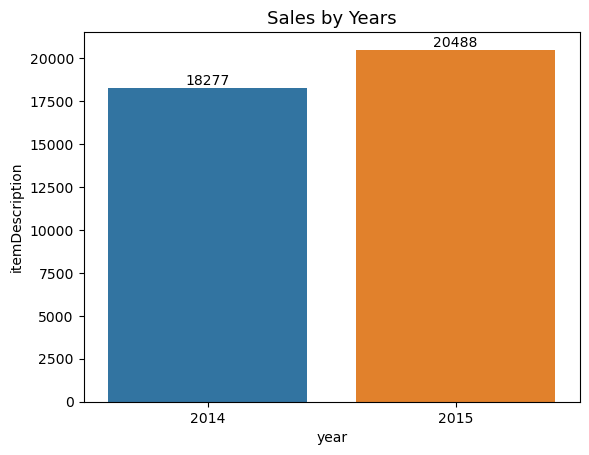

In [32]:
yearss=df.groupby('year')['itemDescription'].count().reset_index() 
ax=sns.barplot(x='year', y='itemDescription',data=yearss)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years', size = 13)    
plt.show()


In [33]:
week=df.groupby('day_of_the_week')['itemDescription'].count().reset_index()
week

,day_of_the_week,itemDescription
0,Friday,5562
1,Monday,5382
2,Saturday,5551
3,Sunday,5530
4,Thursday,5620
5,Tuesday,5558
6,Wednesday,5562


Text(0.5, 1.0, 'SALES ON DIFFERENT DAYS OF THE WEEK')

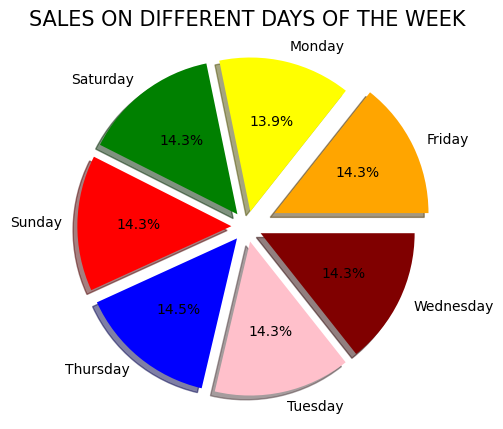

In [34]:
day=week['day_of_the_week']
item=week['itemDescription']
plt.figure(figsize = (13, 5))
explod=(0.2,0.1,0.1,0.1,0.1,0.1,0.1)
colors=['orange','yellow','green','red','blue','pink','maroon']
plt.pie(item,labels=day,explode=explod,colors=colors,shadow=True,autopct='%1.1f%%')
plt.title('SALES ON DIFFERENT DAYS OF THE WEEK',size=15)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



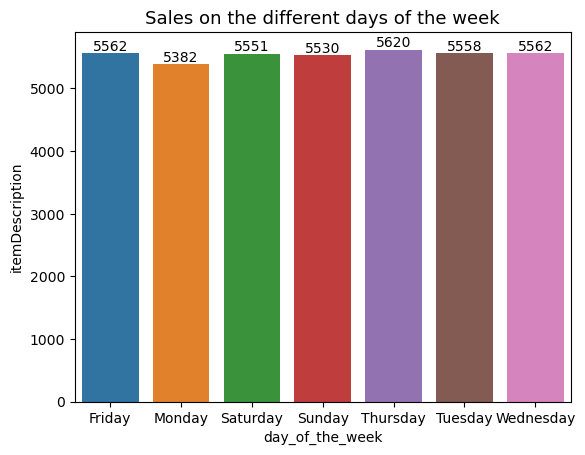

In [35]:
ax=sns.barplot(x='day_of_the_week',y='itemDescription',data=week)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales on the different days of the week', size = 13)    
plt.show()

In [36]:
yd=df.groupby(['day_of_the_week','year'])['itemDescription'].count().reset_index()
yd.rename(columns={'itemDescription':'quantity'},inplace=True)
yd.sort_values(by='day_of_the_week')
yd

,day_of_the_week,year,quantity
0,Friday,2014,2560
1,Friday,2015,3002
2,Monday,2014,2593
3,Monday,2015,2789
4,Saturday,2014,2665
5,Saturday,2015,2886
6,Sunday,2014,2536
7,Sunday,2015,2994
8,Thursday,2014,2738
9,Thursday,2015,2882


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-pac

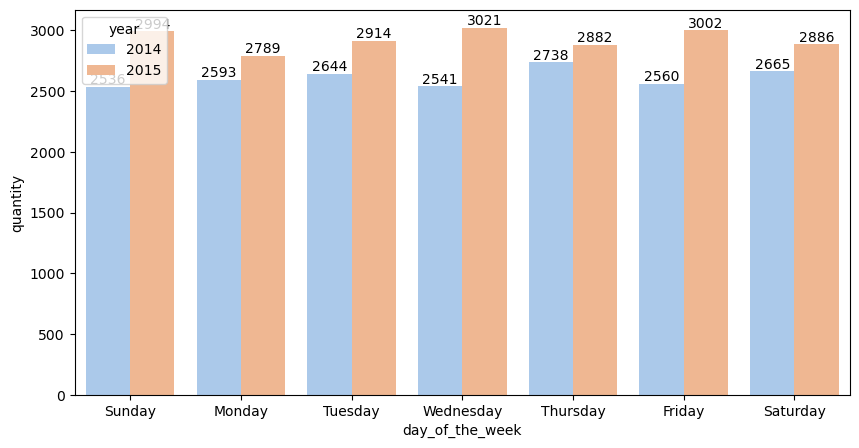

In [37]:
plt.figure(figsize=(10,5))
day_order=CategoricalDtype(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
yd['day_of_the_week']=yd['day_of_the_week'].astype(day_order)
yd=yd.sort_values(by='day_of_the_week')
colors = sns.color_palette("pastel")
ax=sns.barplot(x='day_of_the_week',y='quantity',hue='year',data=yd,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [38]:
month=df.groupby('month')['itemDescription'].count().reset_index()
month

,month,itemDescription
0,April,3260
1,August,3496
2,December,3009
3,February,2997
4,January,3324
5,July,3300
6,June,3264
7,March,3133
8,May,3408
9,November,3254


([<matplotlib.patches.Wedge at 0x24081f70810>,
 [Text(1.4479538041935618, 0.39170113724802097, 'April'),
  Text(0.7570795745882836, 0.7980166149531123, 'August'),
  Text(0.25281158363182765, 1.070554203756899, 'December'),
  Text(-0.277295901658574, 1.0644749799423934, 'February'),
  Text(-0.7634576965572286, 0.7919168804663346, 'January'),
  Text(-1.0610607645939136, 0.29008628688612575, 'July'),
  Text(-1.0615763096249184, -0.2881939257568409, 'June'),
  Text(-0.7792816894382307, -0.7763504675765301, 'March'),
  Text(-0.2797969574011035, -1.0638203150105217, 'May'),
  Text(0.3068602122064124, -1.056331770877235, 'November'),
  Text(0.797249252564224, -0.7578876099302497, 'October'),
  Text(1.0663707979367514, -0.26991354413540647, 'September')],
 [Text(0.9653025361290412, 0.2611340914986806, '8.4%'),
  Text(0.4129524952299728, 0.43528178997442485, '9.0%'),
  Text(0.13789722743554234, 0.583938656594672, '7.8%'),
  Text(-0.1512523099955858, 0.5806227163322145, '7.7%'),
  Text(-0.416431

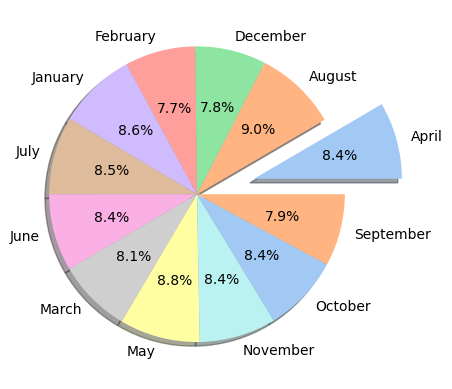

In [39]:
months=month['month']
item=month['itemDescription']
explode=(.4,0,0,0,0,0,0,0,0,0,0,0)
colors=sns.set_palette('pastel')
plt.pie(item,labels=months,explode=explode,shadow=True,autopct= '%1.1f%%')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



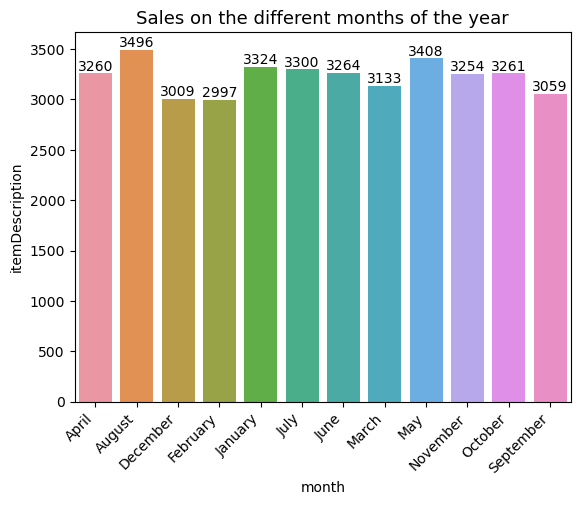

In [40]:
ax=sns.barplot(x='month',y='itemDescription',data=month)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales on the different months of the year', size = 13) 
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
ym=df.groupby(['month','year'])['itemDescription'].count().reset_index()
ym.rename(columns={'itemDescription':'quantity'},inplace=True)
ym

,month,year,quantity
0,April,2014,1561
1,April,2015,1699
2,August,2014,1575
3,August,2015,1921
4,December,2014,1473
5,December,2015,1536
6,February,2014,1437
7,February,2015,1560
8,January,2014,1527
9,January,2015,1797


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

C:\ProgramData\anaconda3\Lib\site-pac

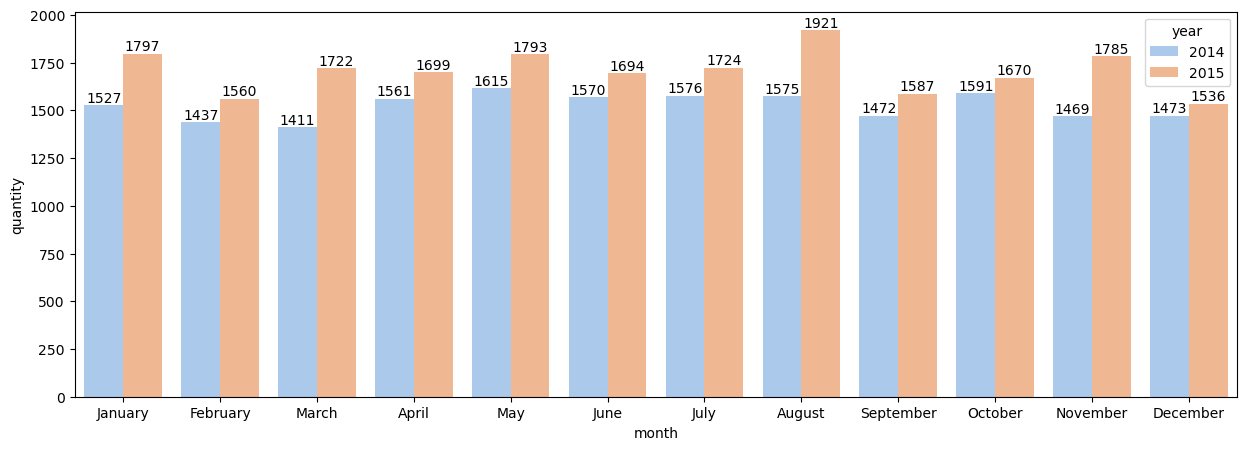

In [42]:
plt.figure(figsize = (15, 5))
months_ordered=CategoricalDtype(['January','February','March','April','May','June','July','August','September','October','November','December'])
ym['month'] = ym['month'].astype(months_ordered)
ym=ym.sort_values(by='month')
colors = sns.color_palette("pastel")
ax = sns.barplot(x='month',y='quantity', data=ym, hue = 'year', palette = colors)
for i in ax.containers:
     ax.bar_label(i)
plt.show() 

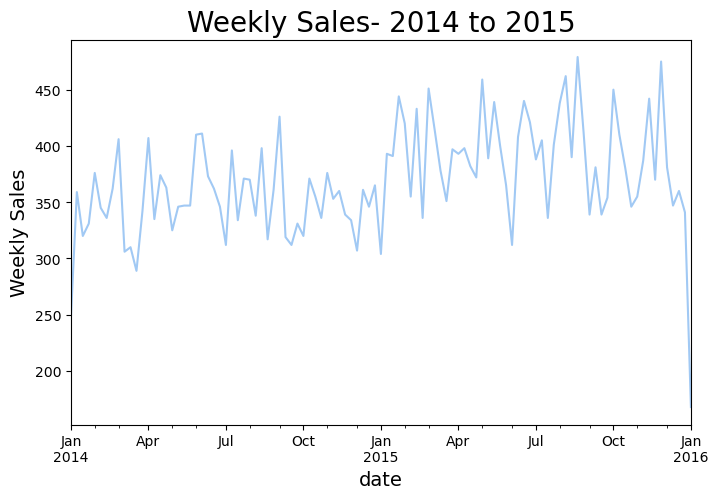

In [43]:
df.set_index('Date',inplace=True)
df.resample('W')[['itemDescription']].count().plot(kind = 'line', figsize =(8,5), legend=None )
plt.title('Weekly Sales- 2014 to 2015', fontsize = 20)
plt.xlabel('date', fontsize = 14)
plt.ylabel('Weekly Sales', fontsize = 14)
plt.show()

Text(0, 0.5, 'Weekly Sales')

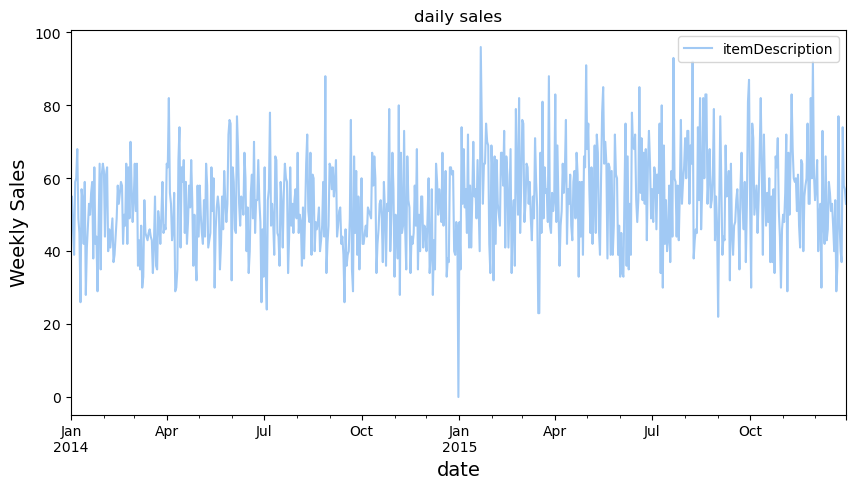

In [44]:
df.resample('D')[['itemDescription']].count().plot(kind='line',figsize=(10,5))
plt.title("daily sales")
plt.xlabel('date', fontsize = 14)
plt.ylabel('Weekly Sales', fontsize = 14)

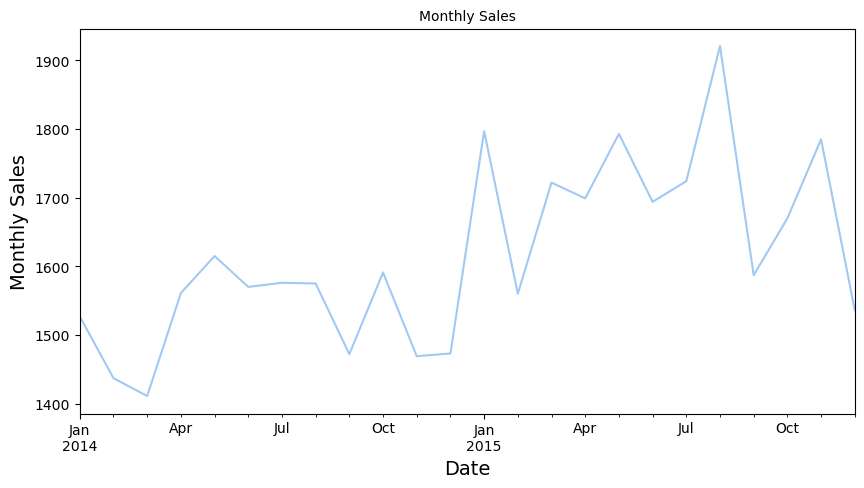

In [45]:
df.resample('M')[['itemDescription']].count().plot(kind = 'line', figsize = (10,5), legend=None )
plt.title('Monthly Sales', fontsize =10)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Sales', fontsize = 14)
plt.show()

In [46]:
 yemo= df.groupby(['year','month'], as_index = False).agg(sales=('itemDescription', 'count'))
yemo.head(12)

,year,month,sales
0,2014,April,1561
1,2014,August,1575
2,2014,December,1473
3,2014,February,1437
4,2014,January,1527
5,2014,July,1576
6,2014,June,1570
7,2014,March,1411
8,2014,May,1615
9,2014,November,1469


C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



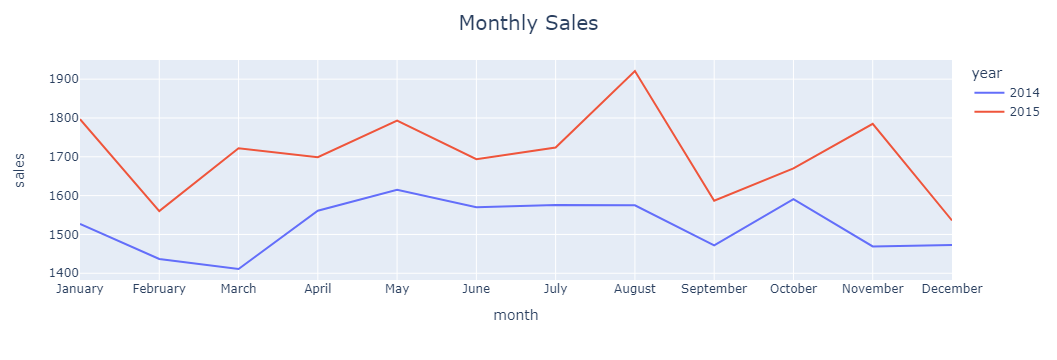

In [47]:

montho = CategoricalDtype(['January','February','March','April','May','June','July','August','September','October','November','December'])
yemo['month'] = yemo['month'].astype(montho)
yemo =yemo.sort_values(by = 'month')
fig = px.line(yemo, x= 'month', y='sales', color = 'year')
fig.update_layout(title_text = 'Monthly Sales', title_x = 0.5,
                 title = {'font': {'size':20}})

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



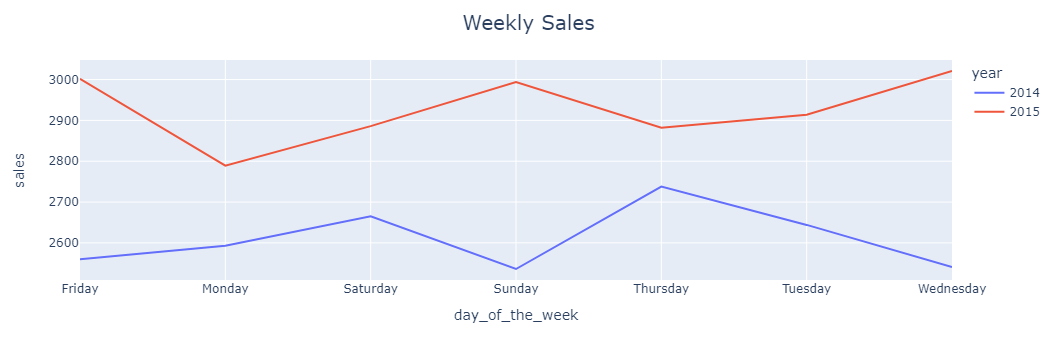

In [48]:
yewe = df.groupby(['year', 'day_of_the_week'], as_index = False).agg(sales=('itemDescription', 'count'))
dayso= CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
yewe['day_of_week'] = yewe['day_of_the_week'].astype(dayso)
yewe = yewe.sort_values(by = 'day_of_the_week')
fig = px.line(yewe, x = 'day_of_the_week',y='sales',color='year')
fig.update_layout(title_text ='Weekly Sales',title_x=0.5,
                 title = {'font': {'size':20}})

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\ProgramData\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



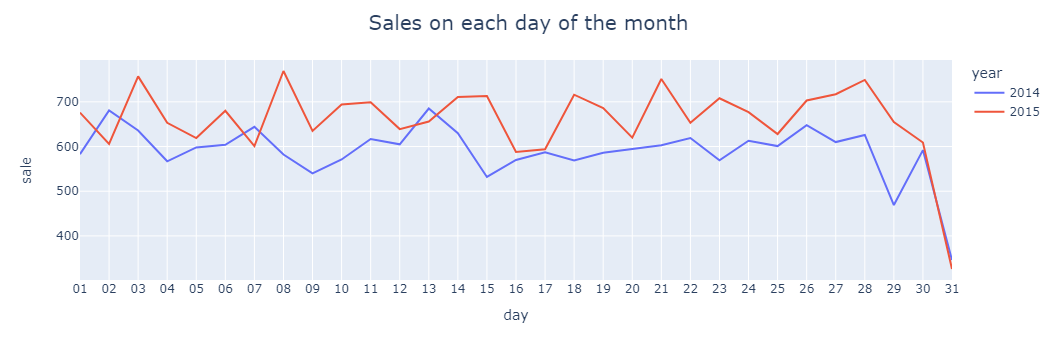

In [49]:
moda= df.groupby(['year','day'], as_index = False).agg(sale=('itemDescription', 'count'))
fig = px.line(moda,x='day', y='sale',color='year')
fig.update_layout(title_text = 'Sales on each day of the month', title_x = 0.5,
                 title = {'font':{'size':20}})
fig.show()

# Apriori algorithm

In [50]:
mba=df.groupby(['Member_number' ,'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')
mba

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
def encoding(x):
    return 1 if x>=1 else 0

In [52]:
mba=mba.applymap(encoding)

C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_20728\3702035072.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [53]:
mba

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
algo=apriori(mba,min_support=.01,use_colnames=True)

C:\Users\Akshata Pandit\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [55]:
algo

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)
...,...,...
3011,0.011031,"(whole milk, yogurt, soda, whipped/sour cream)"
3012,0.010518,"(other vegetables, yogurt, whole milk, bottled..."
3013,0.013597,"(sausage, other vegetables, yogurt, whole milk..."
3014,0.010005,"(other vegetables, yogurt, whole milk, shoppin..."


rule1=association_rules(algo1,metric='confidence',min_threshold=.5)

rule1

rule2=association_rules(algo1,metric='support',min_threshold=0.1)

rule2

In [56]:
rule=association_rules(algo,metric='lift',min_threshold=1)

In [57]:
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801
...,...,...,...,...,...,...,...,...,...,...
15255,(other vegetables),"(yogurt, soda, rolls/buns, whole milk)",0.376603,0.024628,0.013597,0.036104,1.465954,0.004322,1.011905,0.509869
15256,(yogurt),"(soda, other vegetables, rolls/buns, whole milk)",0.282966,0.031811,0.013597,0.048051,1.510499,0.004595,1.017059,0.471340
15257,(whole milk),"(yogurt, soda, other vegetables, rolls/buns)",0.458184,0.020010,0.013597,0.029675,1.483002,0.004428,1.009961,0.601111
15258,(soda),"(yogurt, rolls/buns, other vegetables, whole m...",0.313494,0.034377,0.013597,0.043372,1.261658,0.002820,1.009403,0.302098


In [58]:
algo_rule=rule.sort_values(by='lift',ascending=False).head(20)
algo_rule


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15193,"(yogurt, rolls/buns)","(sausage, other vegetables, whole milk)",0.111339,0.050282,0.013597,0.122120,2.428689,0.007998,1.081831,0.661957
15176,"(sausage, other vegetables, whole milk)","(yogurt, rolls/buns)",0.050282,0.111339,0.013597,0.270408,2.428689,0.007998,1.218025,0.619400
15182,"(yogurt, rolls/buns, other vegetables)","(sausage, whole milk)",0.052335,0.106978,0.013597,0.259804,2.428575,0.007998,1.206467,0.620721
15187,"(sausage, whole milk)","(yogurt, rolls/buns, other vegetables)",0.106978,0.052335,0.013597,0.127098,2.428575,0.007998,1.085650,0.658702
12796,"(curd, yogurt)","(sausage, whole milk)",0.040277,0.106978,0.010005,0.248408,2.322046,0.005696,1.188173,0.593239
12801,"(sausage, whole milk)","(curd, yogurt)",0.106978,0.040277,0.010005,0.093525,2.322046,0.005696,1.058742,0.637549
15180,"(rolls/buns, sausage, whole milk)","(yogurt, other vegetables)",0.048743,0.120318,0.013597,0.278947,2.318415,0.007732,1.219997,0.597810
15189,"(yogurt, other vegetables)","(rolls/buns, sausage, whole milk)",0.120318,0.048743,0.013597,0.113006,2.318415,0.007732,1.072451,0.646451
15181,"(yogurt, other vegetables, whole milk)","(rolls/buns, sausage)",0.071832,0.082350,0.013597,0.189286,2.298554,0.007681,1.131903,0.608665
15188,"(rolls/buns, sausage)","(yogurt, other vegetables, whole milk)",0.082350,0.071832,0.013597,0.165109,2.298554,0.007681,1.111724,0.615642


.apply(lambda x: ' '.join(list(x)))
.apply(lambda x: ' '.join(list(x)))

In [59]:
algo_rules_table=algo_rule[['antecedents','consequents','lift','support','confidence']]

In [60]:
algo_rules_table.round(2)

,antecedents,consequents,lift,support,confidence
15193,"(yogurt, rolls/buns)","(sausage, other vegetables, whole milk)",2.43,0.01,0.12
15176,"(sausage, other vegetables, whole milk)","(yogurt, rolls/buns)",2.43,0.01,0.27
15182,"(yogurt, rolls/buns, other vegetables)","(sausage, whole milk)",2.43,0.01,0.26
15187,"(sausage, whole milk)","(yogurt, rolls/buns, other vegetables)",2.43,0.01,0.13
12796,"(curd, yogurt)","(sausage, whole milk)",2.32,0.01,0.25
12801,"(sausage, whole milk)","(curd, yogurt)",2.32,0.01,0.09
15180,"(rolls/buns, sausage, whole milk)","(yogurt, other vegetables)",2.32,0.01,0.28
15189,"(yogurt, other vegetables)","(rolls/buns, sausage, whole milk)",2.32,0.01,0.11
15181,"(yogurt, other vegetables, whole milk)","(rolls/buns, sausage)",2.30,0.01,0.19
15188,"(rolls/buns, sausage)","(yogurt, other vegetables, whole milk)",2.30,0.01,0.17


In [61]:
display(HTML(algo_rules_table.to_html(index=False)))

antecedents,consequents,lift,support,confidence
"(yogurt, rolls/buns)","(sausage, other vegetables, whole milk)",2.428689,0.013597,0.122120
"(sausage, other vegetables, whole milk)","(yogurt, rolls/buns)",2.428689,0.013597,0.270408
"(yogurt, rolls/buns, other vegetables)","(sausage, whole milk)",2.428575,0.013597,0.259804
"(sausage, whole milk)","(yogurt, rolls/buns, other vegetables)",2.428575,0.013597,0.127098
"(curd, yogurt)","(sausage, whole milk)",2.322046,0.010005,0.248408
"(sausage, whole milk)","(curd, yogurt)",2.322046,0.010005,0.093525
"(rolls/buns, sausage, whole milk)","(yogurt, other vegetables)",2.318415,0.013597,0.278947
"(yogurt, other vegetables)","(rolls/buns, sausage, whole milk)",2.318415,0.013597,0.113006
"(yogurt, other vegetables, whole milk)","(rolls/buns, sausage)",2.298554,0.013597,0.189286
"(rolls/buns, sausage)","(yogurt, other vegetables, whole milk)",2.298554,0.013597,0.165109


# APRIORI ALGORITHM RESULT 
Antecedents are the purchased items and consequents are the item that are probably purchased along with the Antecedents.
Lift indicates the the items  in rows are purchased togethermore oftenly.And confidence indicates   reliable rules.

For example if a person purchases whole milk, sausage, other vegetables	 there is consequence if purchasing yogurt, rolls/buns also.
The lift of 2.43 indicates that these items are purchased together more often than expected by chance.
The confidence .27 shows if aperson buys whole milk, sausage, other vegetables 27% chance of buying yogurt and bun also.
